In [123]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Import Dataset

In [124]:
# Muat semua dataset
df_customers = pd.read_csv('../data/data-raw/customers_dataset.csv')
df_geolocation = pd.read_csv('../data/data-raw/geolocation_dataset.csv')
df_order_items = pd.read_csv('../data/data-raw/order_items_dataset.csv')
df_order_payments = pd.read_csv('../data/data-raw/order_payments_dataset.csv')
df_order_reviews = pd.read_csv('../data/data-raw/order_reviews_dataset.csv')
df_orders = pd.read_csv('../data/data-raw/orders_dataset.csv')
df_product_category_name_translation = pd.read_csv('../data/data-raw/product_category_name_translation.csv')
df_products = pd.read_csv('../data/data-raw/products_dataset.csv')
df_sellers = pd.read_csv('../data/data-raw/sellers_dataset.csv')

# Merge Semua Data Berdasarkan "customer_id"

In [125]:
# Gabungkan order dengan customers
merged_df = pd.merge(df_orders, df_customers, on='customer_id', how='left')

# Gabungkan dengan order_items
merged_df = pd.merge(merged_df, df_order_items, on='order_id', how='left')

# Gabungkan dengan products
merged_df = pd.merge(merged_df, df_products, on='product_id', how='left')

# Gabungkan dengan sellers
merged_df = pd.merge(merged_df, df_sellers, on='seller_id', how='left')

# Gabungkan dengan order_payments
merged_df = pd.merge(merged_df, df_order_payments, on='order_id', how='left')

# Gabungkan dengan order_reviews
merged_df = pd.merge(merged_df, df_order_reviews, on='order_id', how='left')

# Gabungkan dengan product_category_name_translation
merged_df = pd.merge(merged_df, df_product_category_name_translation, on='product_category_name', how='left')

# Penanganan duplikasi baris
merged_df.drop_duplicates(inplace=True)

In [126]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


# Cek Informasi Data Awal

In [127]:
merged_df.shape

(119143, 40)

In [128]:
print("\nInformasi DataFrame Gabungan:")
merged_df.info()


Informasi DataFrame Gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12 

Hapus kolom yang mungkin tidak diperlukan

In [129]:
merged_df = merged_df.drop(columns=['order_id', 'customer_id', 'product_id', 
                                    'seller_id', 'customer_unique_id', 'customer_zip_code_prefix', 
                                    'customer_state', 'order_item_id', 'product_name_lenght',
                                    'product_description_lenght', 'seller_zip_code_prefix',
                                    'review_id', 'review_comment_title', 'review_answer_timestamp',
                                    'product_category_name', 'review_comment_message'])

In [130]:
merged_df.shape

(119143, 24)

# Cek Data Kosong

In [131]:
# Mengecek jumlah data kosong per kolom
print("Jumlah data kosong per kolom:")
print(merged_df.isnull().sum())

Jumlah data kosong per kolom:
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
customer_city                       0
shipping_limit_date               833
price                             833
freight_value                     833
product_photos_qty               2542
product_weight_g                  853
product_length_cm                 853
product_height_cm                 853
product_width_cm                  853
seller_city                       833
seller_state                      833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      997
review_creation_date              997
product_category_name_english    2567
dtype: int64


Hapus data yang kosong

In [132]:
merged_df = merged_df.dropna()

In [133]:
# Mengecek jumlah data kosong per kolom
print("Jumlah data kosong per kolom:")
print(merged_df.isnull().sum())

Jumlah data kosong per kolom:
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_city                    0
shipping_limit_date              0
price                            0
freight_value                    0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_city                      0
seller_state                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_creation_date             0
product_category_name_english    0
dtype: int64


In [134]:
merged_df.shape

(113193, 24)

# Konversi kolom tanggal ke objek datetime

In [135]:
# Konversi kolom tanggal ke objek datetime
date_columns = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date'
]

for col in date_columns:
    merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

# Cek baris unik setiap kolom

In [136]:
print("\nJumlah nilai unik per kolom:")
print(merged_df.nunique())


Jumlah nilai unik per kolom:
order_status                         2
order_purchase_timestamp         93974
order_approved_at                86571
order_delivered_carrier_date     78413
order_delivered_customer_date    93687
order_estimated_delivery_date      444
customer_city                     4071
shipping_limit_date              89534
price                             5773
freight_value                     6880
product_photos_qty                  19
product_weight_g                  2165
product_length_cm                   99
product_height_cm                  102
product_width_cm                    94
seller_city                        587
seller_state                        22
payment_sequential                  26
payment_type                         4
payment_installments                24
payment_value                    28271
review_score                         5
review_creation_date               626
product_category_name_english       71
dtype: int64


In [137]:
merged_df.head(5)
merged_df.to_csv('data-ecommerce.csv', index=False)

# Identifikasi Pola dan Hubungan

In [138]:
# Deskripsi Kolom Numerik dengan 2 angka di belakang koma
print("\n--- Deskripsi Kolom Numerik ---")
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(merged_df[numerical_cols].describe())


--- Deskripsi Kolom Numerik ---


,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score
count,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00,113193.00
mean,119.85,20.00,2.21,2106.24,30.28,16.60,23.10,1.09,2.94,171.56,4.08
std,181.08,15.71,1.72,3765.21,16.15,13.44,11.74,0.69,2.78,264.20,1.35
min,0.85,0.00,1.00,0.00,7.00,2.00,6.00,1.00,0.00,0.00,1.00
25%,39.90,13.08,1.00,300.00,18.00,8.00,15.00,1.00,1.00,60.85,4.00
50%,74.90,16.32,1.00,700.00,25.00,13.00,20.00,1.00,2.00,107.96,5.00
75%,132.98,21.19,3.00,1800.00,38.00,20.00,30.00,1.00,4.00,189.15,5.00
max,6735.00,409.68,20.00,40425.00,105.00,105.00,118.00,26.00,24.00,13664.08,5.00


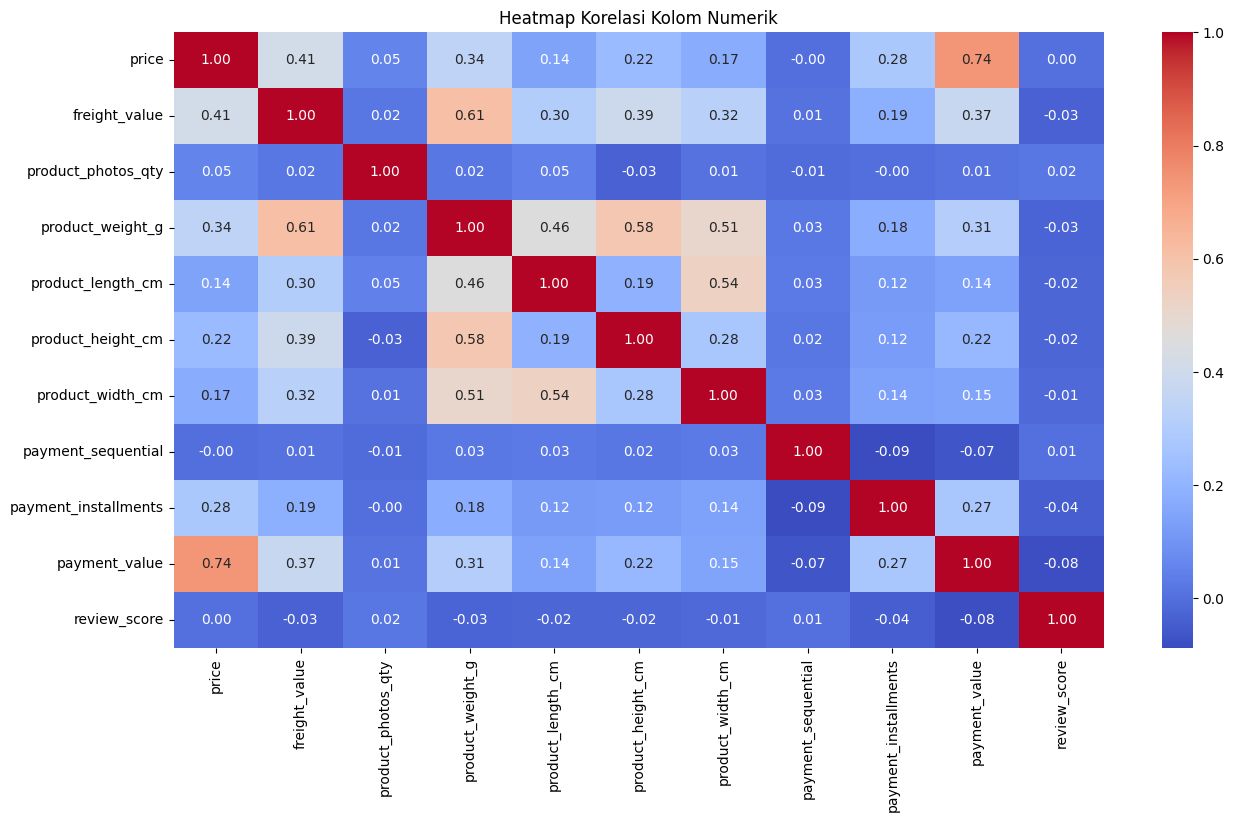

In [139]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

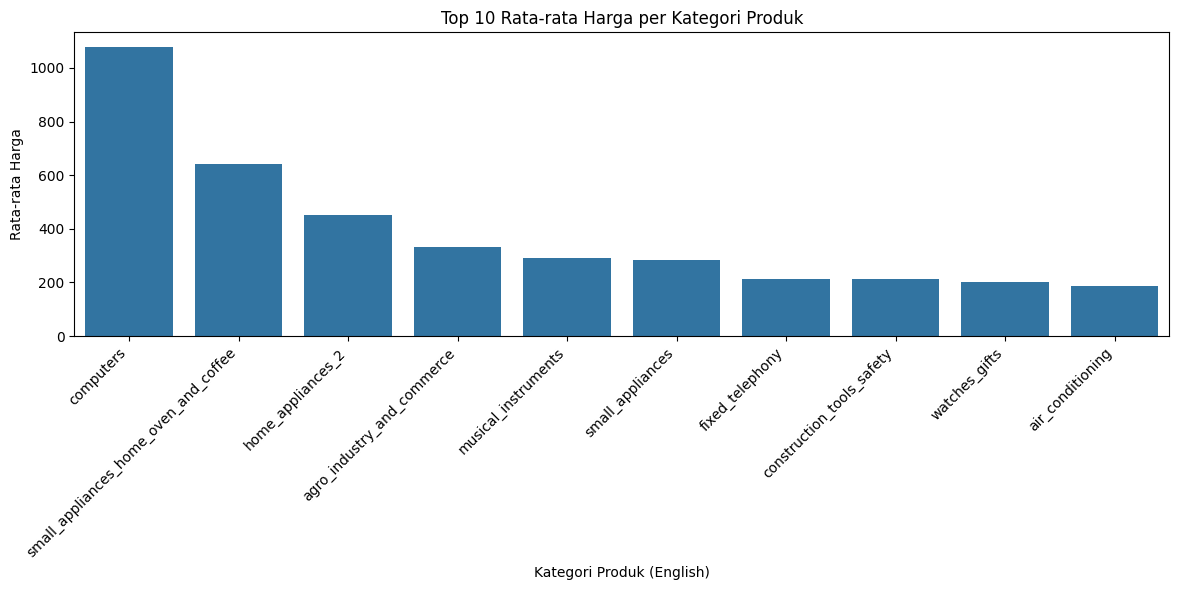

In [140]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_category.head(10).index, y=avg_price_by_category.head(10).values)
plt.title('Top 10 Rata-rata Harga per Kategori Produk')
plt.ylabel('Rata-rata Harga')
plt.xlabel('Kategori Produk (English)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

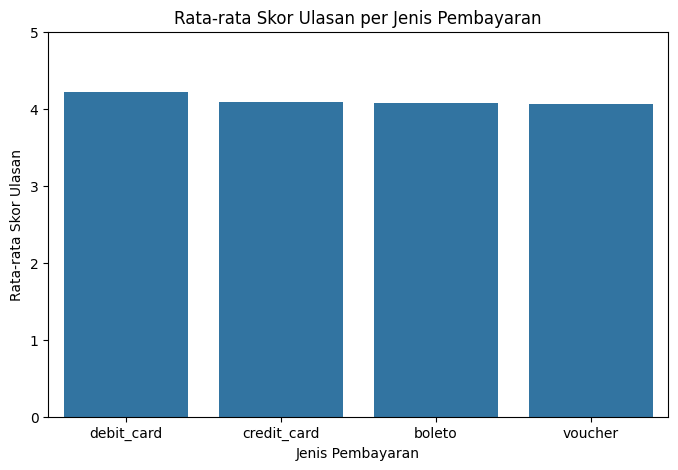

In [141]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_review_by_payment_type.index, y=avg_review_by_payment_type.values)
plt.title('Rata-rata Skor Ulasan per Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Rata-rata Skor Ulasan')
plt.ylim(0, 5)
plt.show()

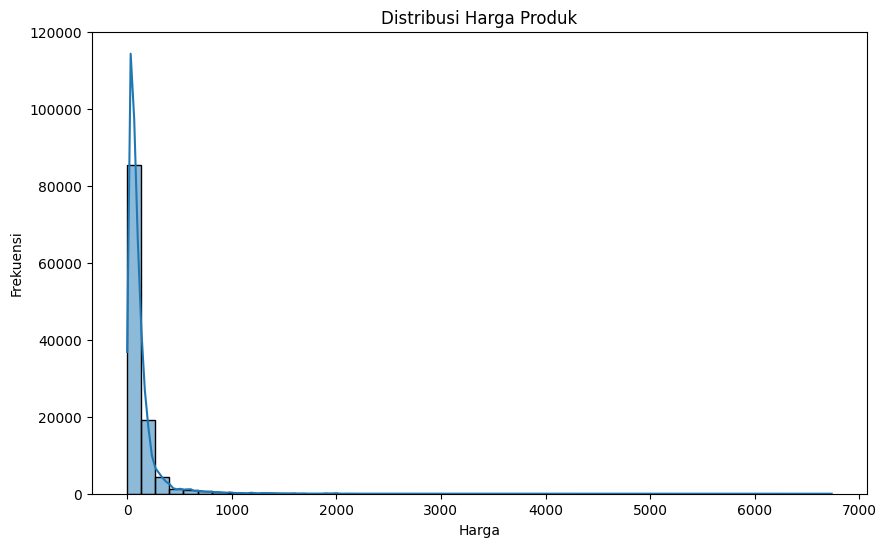

In [142]:
# 1. Histogram Harga Produk
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\RAFI\AppData\Local\Temp\ipykernel_3392\686070520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=merged_df, x='order_status', order=merged_df['order_status'].value_counts().index, palette='viridis')


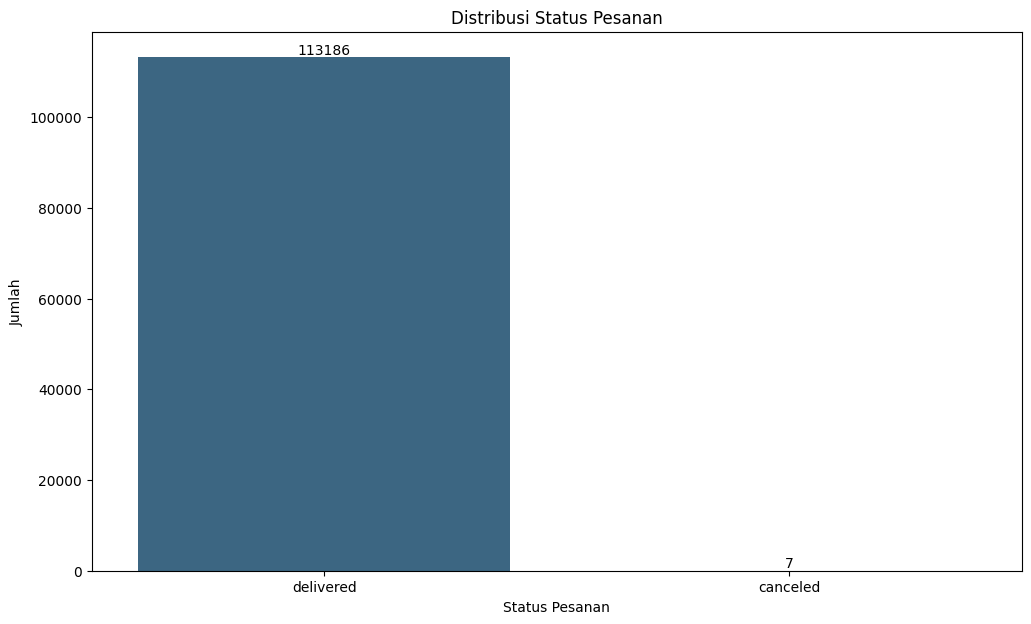

In [143]:
# 2. Bar Chart Status Pesanan (X dan Y ditukar, nilai di atas bar)
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=merged_df, x='order_status', order=merged_df['order_status'].value_counts().index, palette='viridis')
plt.title('Distribusi Status Pesanan')
plt.ylabel('Jumlah')
plt.xlabel('Status Pesanan')

# Tampilkan nilai di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

C:\Users\RAFI\AppData\Local\Temp\ipykernel_3392\1794959202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, y='product_category_name_english', order=top_10_categories, palette='magma')


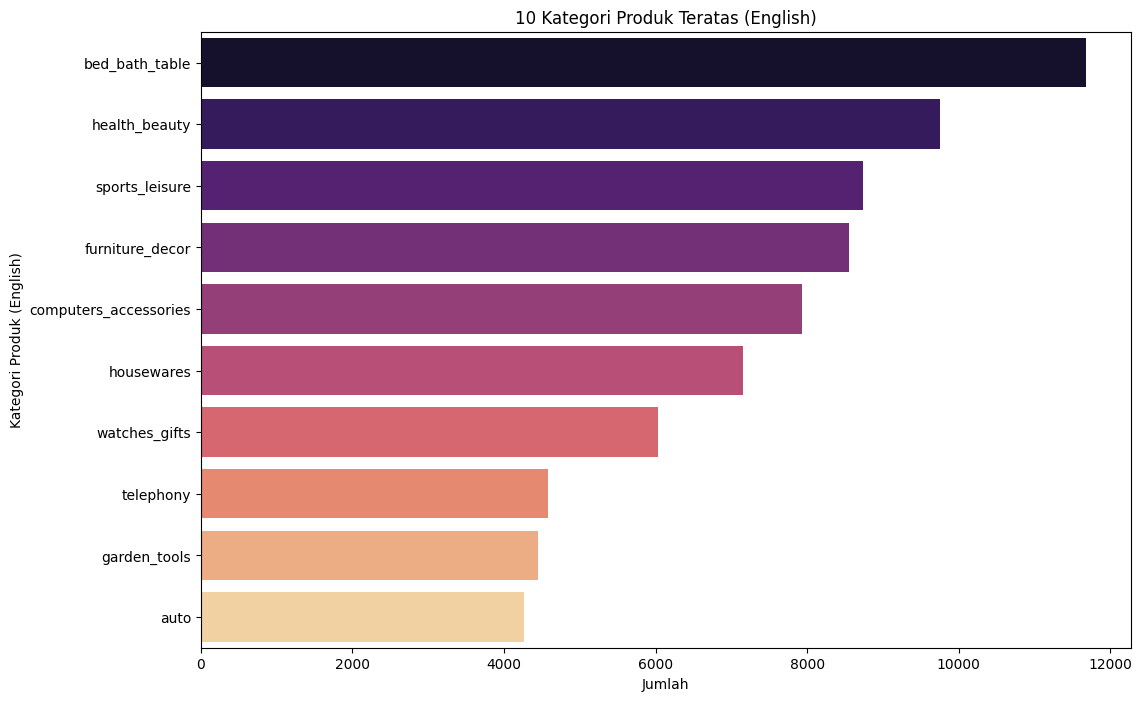

In [144]:
# 3. Bar Chart 10 Kategori Produk Teratas (English)
plt.figure(figsize=(12, 8))
top_10_categories = merged_df['product_category_name_english'].value_counts().head(10).index
sns.countplot(data=merged_df, y='product_category_name_english', order=top_10_categories, palette='magma')
plt.title('10 Kategori Produk Teratas (English)')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Produk (English)')
plt.show()

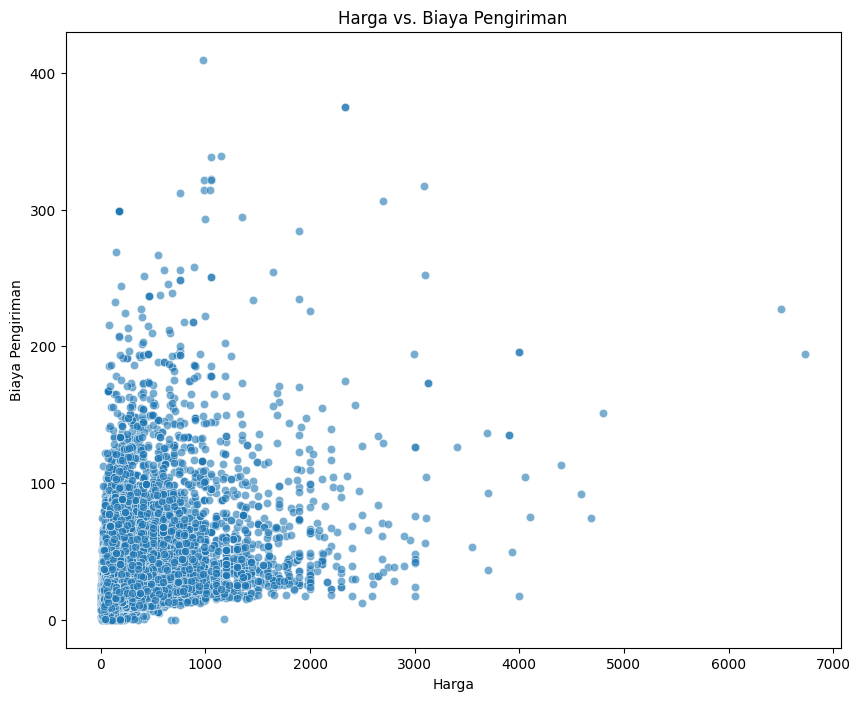

In [145]:
plt.savefig('top_10_product_categories_bar_chart.png')
plt.close()

# 4. Scatter Plot Harga vs. Biaya Pengiriman
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='price', y='freight_value', alpha=0.6)
plt.title('Harga vs. Biaya Pengiriman')
plt.xlabel('Harga')
plt.ylabel('Biaya Pengiriman')
plt.show()

# Analisis Tren Pesanan Bulanan

Jumlah Pesanan Bulanan:
                           order_count
order_purchase_year_month             
2016-10                            334
2016-12                              1
2017-01                            955
2017-02                           1890
2017-03                           3010


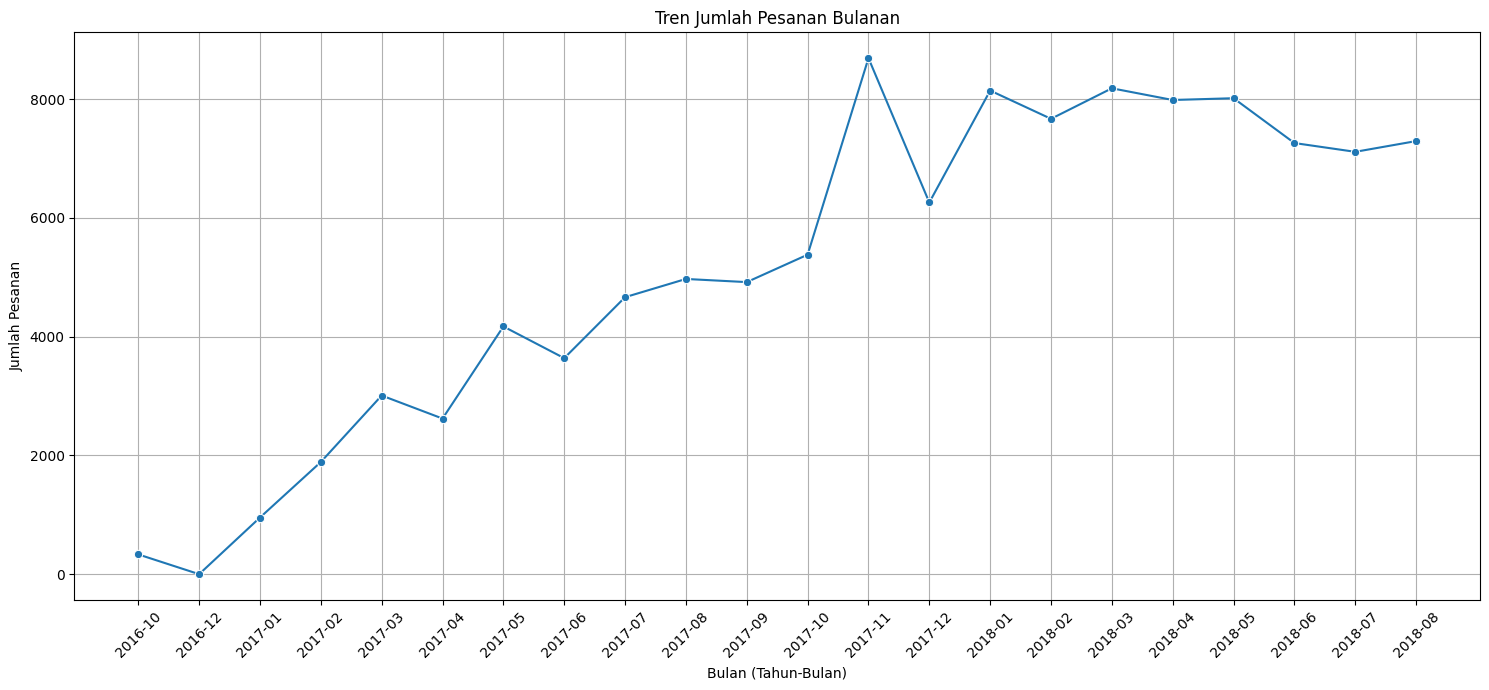

In [146]:
# Ekstrak tahun dan bulan dari kolom tanggal pembelian
merged_df['order_purchase_year_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pesanan per bulan
monthly_orders = merged_df['order_purchase_year_month'].value_counts().sort_index()

# Konversi ke DataFrame untuk visualisasi
monthly_orders_df = monthly_orders.to_frame(name='order_count')
monthly_orders_df.index = monthly_orders_df.index.astype(str) # Ubah PeriodIndex ke string untuk plotting

print("Jumlah Pesanan Bulanan:")
print(monthly_orders_df.head())

plt.figure(figsize=(15, 7))
sns.lineplot(x=monthly_orders_df.index, y='order_count', data=monthly_orders_df, marker='o')
plt.title('Tren Jumlah Pesanan Bulanan')
plt.xlabel('Bulan (Tahun-Bulan)')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Insight: Lihat apakah ada pola pertumbuhan, penurunan, atau musiman.
# Misalnya, apakah ada bulan-bulan tertentu dengan lonjakan pesanan?

# Analisis Performa Pengiriman dan Dampaknya pada Skor Ulasan


Statistik Durasi Pengiriman Aktual:
count    113193.000000
mean         11.976447
std           9.362094
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: actual_delivery_duration, dtype: float64

Statistik Selisih Pengiriman vs Estimasi:
count    113193.000000
mean         11.091092
std          10.090406
min        -189.000000
25%           6.000000
50%          12.000000
75%          16.000000
max         146.000000
Name: delivery_vs_estimated, dtype: float64


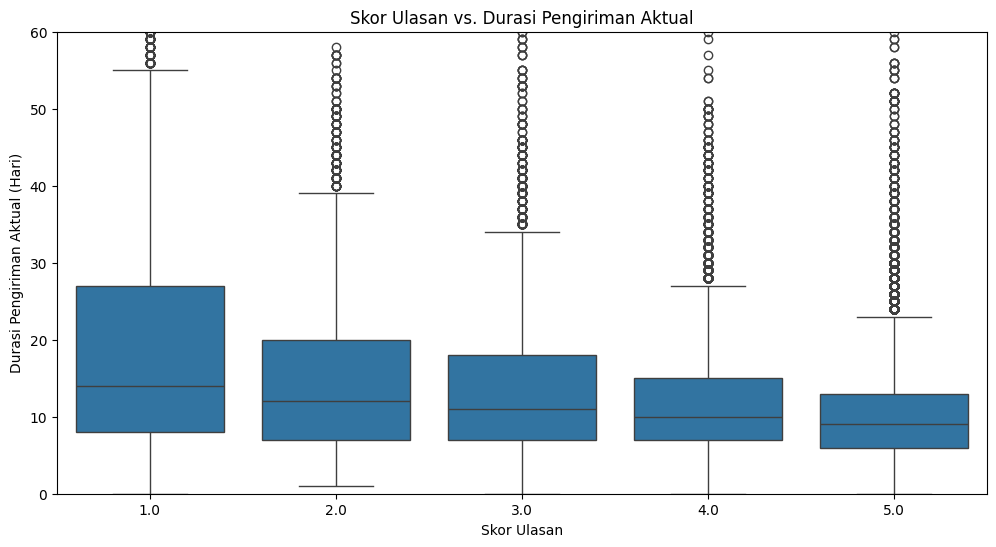

In [147]:
# Hitung durasi pengiriman aktual (dalam hari)
merged_df['actual_delivery_duration'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

# Hitung selisih antara estimasi dan pengiriman aktual (dalam hari)
# Nilai positif berarti dikirim lebih cepat dari estimasi, negatif berarti lebih lambat
merged_df['delivery_vs_estimated'] = (merged_df['order_estimated_delivery_date'] - merged_df['order_delivered_customer_date']).dt.days

print("\nStatistik Durasi Pengiriman Aktual:")
print(merged_df['actual_delivery_duration'].describe())
print("\nStatistik Selisih Pengiriman vs Estimasi:")
print(merged_df['delivery_vs_estimated'].describe())

# Visualisasi hubungan durasi pengiriman dengan skor ulasan
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='actual_delivery_duration', data=merged_df)
plt.title('Skor Ulasan vs. Durasi Pengiriman Aktual')
plt.xlabel('Skor Ulasan')
plt.ylabel('Durasi Pengiriman Aktual (Hari)')
plt.ylim(0, 60) # Batasi y-axis untuk visualisasi yang lebih baik, karena ada outlier
plt.show()

# Insight: Apakah durasi pengiriman yang lebih lama menyebabkan skor ulasan yang lebih rendah?
# Apakah pengiriman yang lebih cepat dari estimasi menghasilkan skor ulasan yang lebih tinggi?

# Distribusi Pembayaran Angsuran dan Nilainya


Distribusi Jumlah Angsuran:
payment_installments
1.0     56401
2.0     13154
3.0     11315
4.0      7694
10.0     6633
5.0      5812
8.0      4878
6.0      4452
7.0      1739
9.0       695
Name: count, dtype: int64

Rata-rata Nilai Pembayaran per Jumlah Angsuran:
payment_installments
24.0    801.737941
20.0    555.112632
18.0    493.345263
10.0    428.199513
16.0    395.081429
15.0    380.415455
12.0    317.557453
8.0     306.767878
21.0    258.865000
23.0    236.480000
Name: payment_value, dtype: float64


C:\Users\RAFI\AppData\Local\Temp\ipykernel_3392\1160798820.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_payment_value_by_installments.index, y=avg_payment_value_by_installments.values, palette='crest')


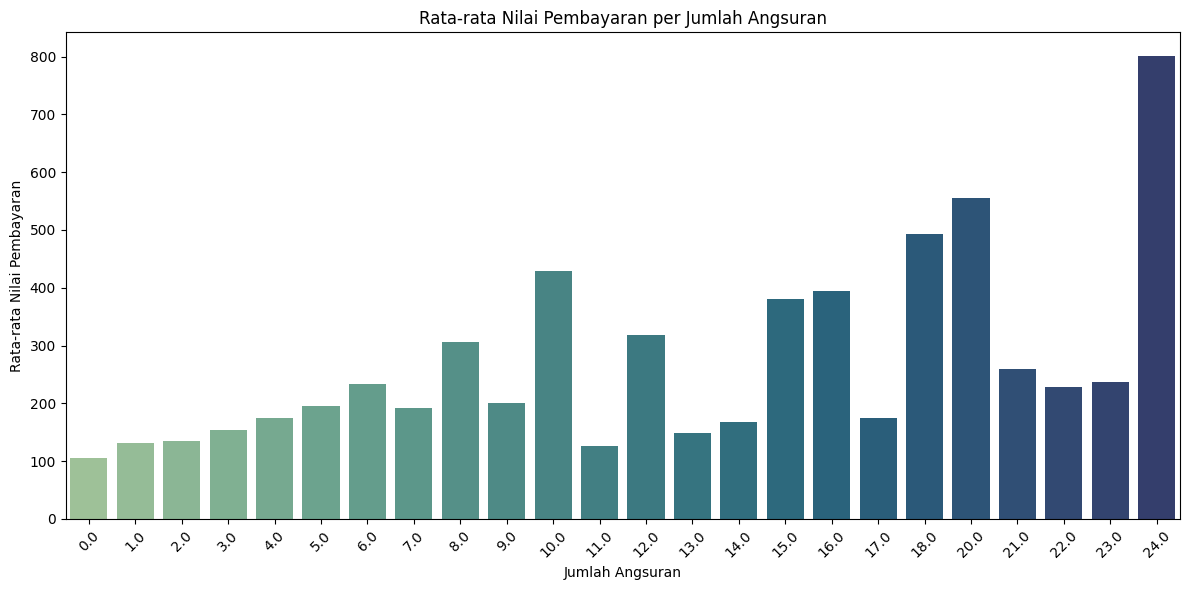

In [148]:
# Distribusi jumlah angsuran
print("\nDistribusi Jumlah Angsuran:")
print(merged_df['payment_installments'].value_counts().head(10))

# Rata-rata nilai pembayaran per jumlah angsuran
avg_payment_value_by_installments = merged_df.groupby('payment_installments')['payment_value'].mean().sort_values(ascending=False)
print("\nRata-rata Nilai Pembayaran per Jumlah Angsuran:")
print(avg_payment_value_by_installments.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_payment_value_by_installments.index, y=avg_payment_value_by_installments.values, palette='crest')
plt.title('Rata-rata Nilai Pembayaran per Jumlah Angsuran')
plt.xlabel('Jumlah Angsuran')
plt.ylabel('Rata-rata Nilai Pembayaran')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight: Apakah pelanggan cenderung menggunakan lebih banyak angsuran untuk pembelian bernilai tinggi?

# Insight Geografis (Kota Pelanggan Teratas & Provinsi Penjual Teratas)

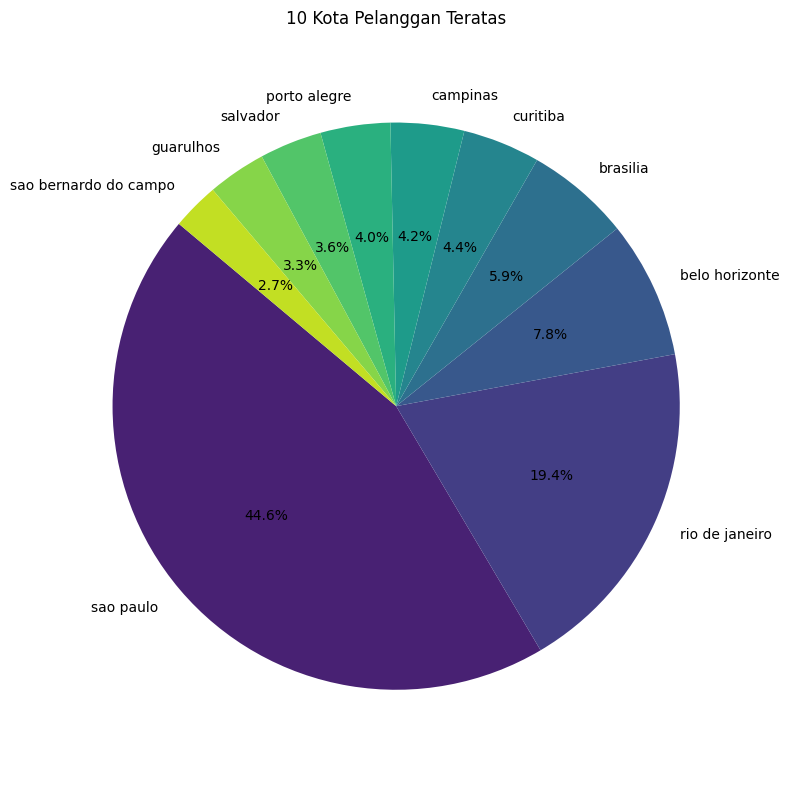

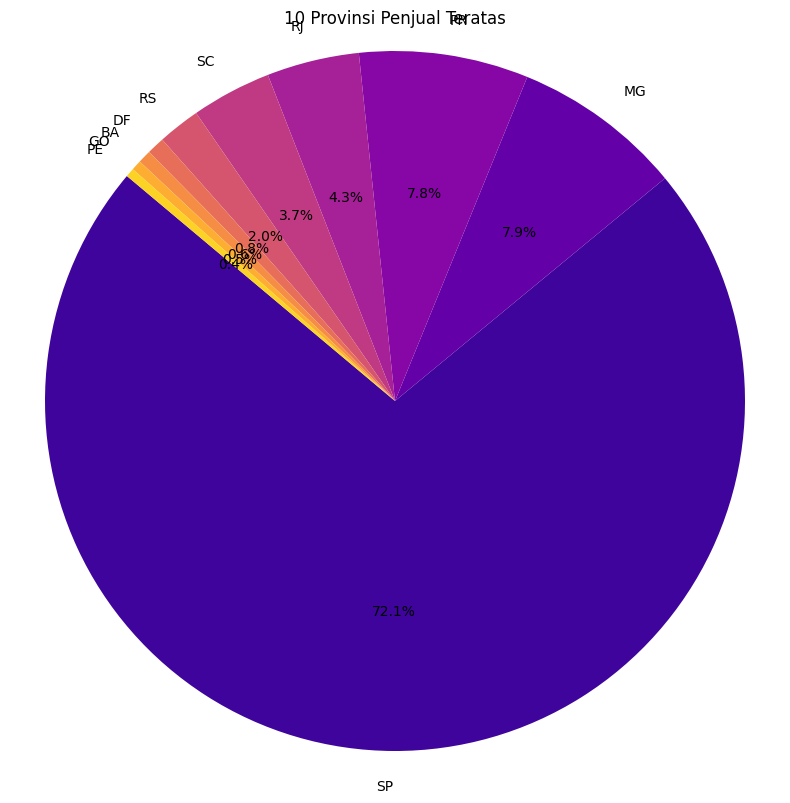

In [149]:
# Top 10 Kota Pelanggan - Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_customer_cities.values, labels=top_10_customer_cities.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('10 Kota Pelanggan Teratas')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Top 10 Provinsi Penjual - Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_seller_states.values, labels=top_10_seller_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma', 10))
plt.title('10 Provinsi Penjual Teratas')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Hubungan Dimensi Produk dan Biaya Pengiriman


Matriks Korelasi Dimensi Produk dan Biaya Pengiriman:
                   product_weight_g  product_length_cm  product_height_cm  \
product_weight_g           1.000000           0.458508           0.582986   
product_length_cm          0.458508           1.000000           0.188631   
product_height_cm          0.582986           0.188631           1.000000   
product_width_cm           0.505460           0.535033           0.275359   
freight_value              0.611866           0.303105           0.391822   

                   product_width_cm  freight_value  
product_weight_g           0.505460       0.611866  
product_length_cm          0.535033       0.303105  
product_height_cm          0.275359       0.391822  
product_width_cm           1.000000       0.322015  
freight_value              0.322015       1.000000  


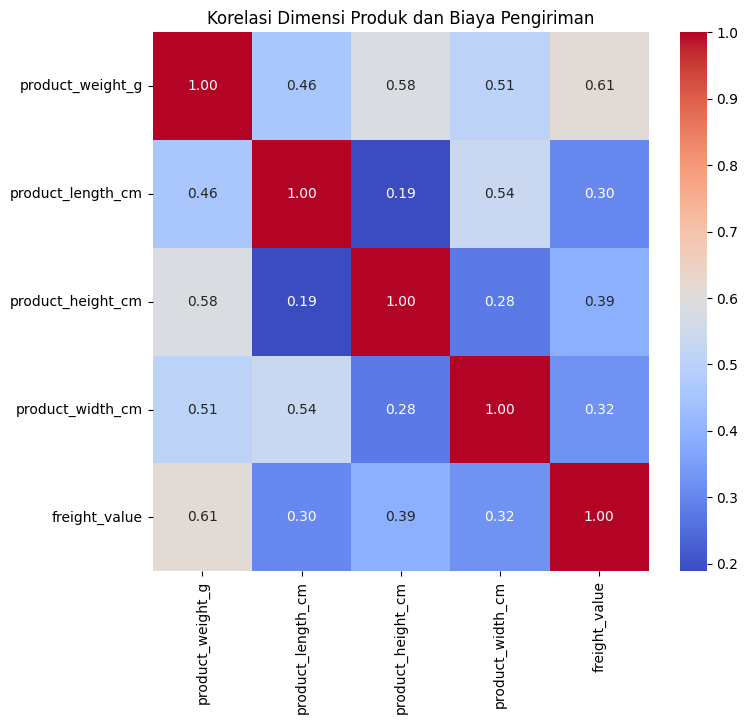

In [150]:
# Korelasi antara dimensi/berat produk dan biaya pengiriman
product_dimensions_freight_corr = merged_df[[
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'freight_value'
]].corr()

print("\nMatriks Korelasi Dimensi Produk dan Biaya Pengiriman:")
print(product_dimensions_freight_corr)

plt.figure(figsize=(8, 7))
sns.heatmap(product_dimensions_freight_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Dimensi Produk dan Biaya Pengiriman')
plt.show()

# Insight: Mana dari dimensi produk (berat, panjang, tinggi, lebar) yang paling berkorelasi dengan biaya pengiriman?
# Ini bisa membantu dalam optimasi logistik.

# Waktu Proses Pesanan (Dari Pembelian hingga Pengiriman ke Kurir)


Statistik Durasi Proses Pesanan (Pembelian ke Kurir):
count    113193.000000
mean          2.782699
std           3.623867
min        -172.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         107.000000
Name: order_processing_duration, dtype: float64


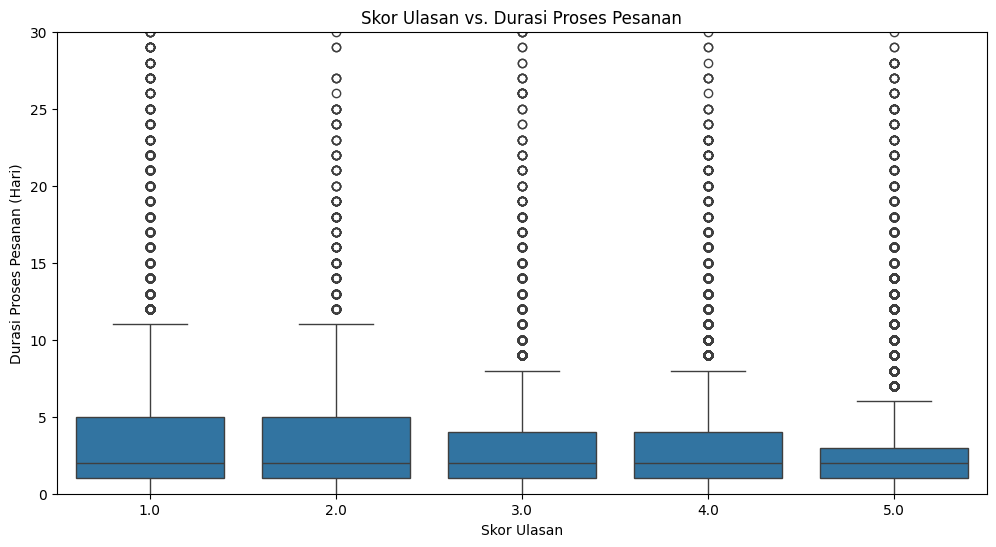

In [151]:
# Hitung durasi proses (dari pembelian hingga diserahkan ke kurir) dalam hari
merged_df['order_processing_duration'] = (merged_df['order_delivered_carrier_date'] - merged_df['order_purchase_timestamp']).dt.days

print("\nStatistik Durasi Proses Pesanan (Pembelian ke Kurir):")
print(merged_df['order_processing_duration'].describe())

# Visualisasi durasi proses vs. skor ulasan
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='order_processing_duration', data=merged_df)
plt.title('Skor Ulasan vs. Durasi Proses Pesanan')
plt.xlabel('Skor Ulasan')
plt.ylabel('Durasi Proses Pesanan (Hari)')
plt.ylim(0, 30) # Batasi y-axis untuk visualisasi yang lebih baik, karena ada outlier
plt.show()

# Insight: Apakah durasi proses yang lebih lama berkorelasi dengan skor ulasan yang lebih rendah?
# Ini bisa mengindikasikan area untuk perbaikan operasional bagi penjual.

# Distribusi Jenis Pembayaran dan Rata-rata Nilai Pembayaran

C:\Users\RAFI\AppData\Local\Temp\ipykernel_3392\1167651881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=merged_df, order=merged_df['payment_type'].value_counts().index, palette='BuGn')


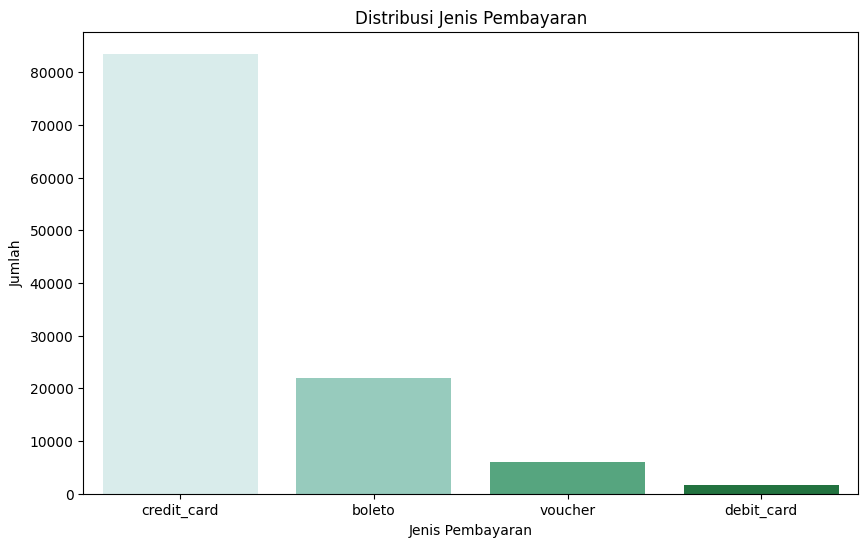


Rata-rata Nilai Pembayaran per Jenis Pembayaran:
payment_type
credit_card    178.609835
boleto         175.774904
debit_card     149.445684
voucher         64.277077
Name: payment_value, dtype: float64


C:\Users\RAFI\AppData\Local\Temp\ipykernel_3392\1167651881.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_payment_value_by_type.index, y=avg_payment_value_by_type.values, palette='YlOrRd')


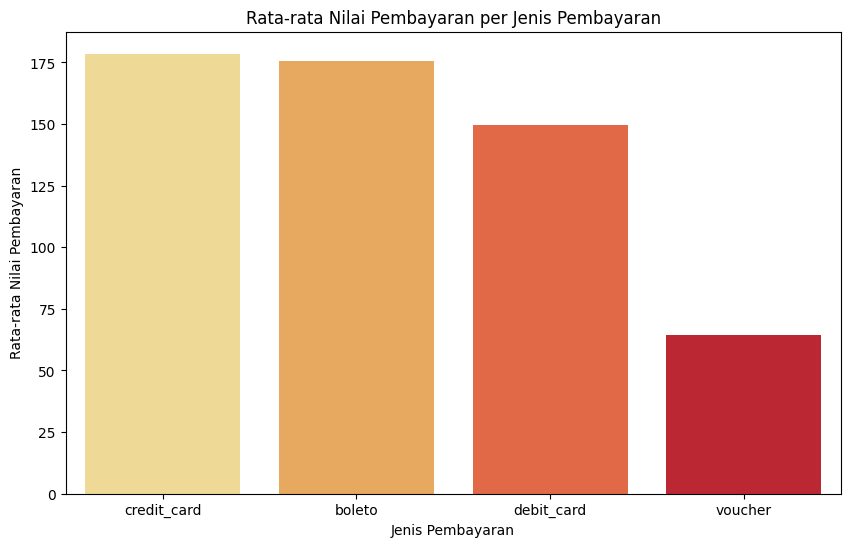

In [152]:
# Distribusi Jenis Pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=merged_df, order=merged_df['payment_type'].value_counts().index, palette='BuGn')
plt.title('Distribusi Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah')
plt.show()

# Rata-rata Nilai Pembayaran per Jenis Pembayaran
avg_payment_value_by_type = merged_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)
print("\nRata-rata Nilai Pembayaran per Jenis Pembayaran:")
print(avg_payment_value_by_type)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_payment_value_by_type.index, y=avg_payment_value_by_type.values, palette='YlOrRd')
plt.title('Rata-rata Nilai Pembayaran per Jenis Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Rata-rata Nilai Pembayaran')
plt.show()

# Insight: Apakah ada jenis pembayaran tertentu yang terkait dengan transaksi bernilai tinggi?
# Misalnya, apakah kartu kredit digunakan untuk pembelian yang lebih mahal dibandingkan boleto?